# Room Occupancy Detection Using Sensor Data

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
import numpy as np
import yellowbrick as yb

warnings.simplefilter('ignore')

<h2 align=center> Feature Analysis </h2>

Components:
1. `Define` a bounded, high dimensional feature space that can be effectively modeled.
2. `Transform` and manipulate the space to make modeling eaier.
3. `Extract` a feature representation of each instance in the space.

### Load the Classification Data
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [2]:
# Load the classification data set
data = pd.read_csv('occupancy.csv')
data.head()

,datetime,temperature,relative humidity,light,C02,humidity,occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [3]:
# Specify the features of interest
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

In [4]:
# Extract the instances and target
X = data[features]
y = data.occupancy

### Feature Analysis - Scatter Plot

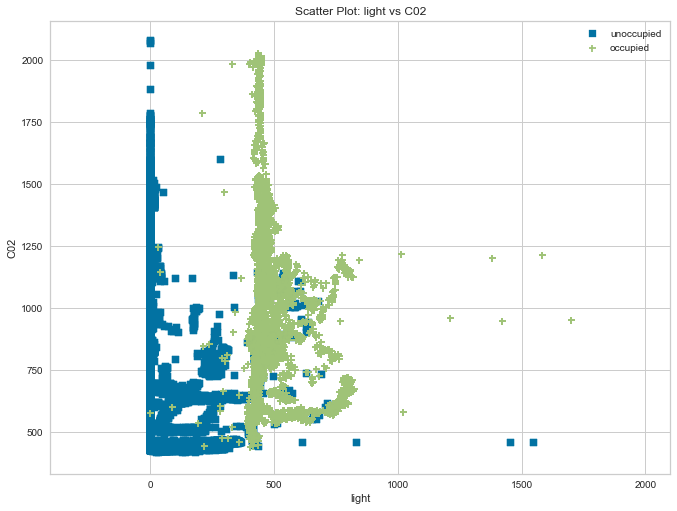

In [9]:
from yellowbrick.contrib.scatter import ScatterVisualizer

visualizer = ScatterVisualizer(x="light", y="C02", classes=classes, size=(800, 600))

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

### Task 5: Feature Analysis - RadViz
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [10]:
from yellowbrick.features.radviz import RadViz

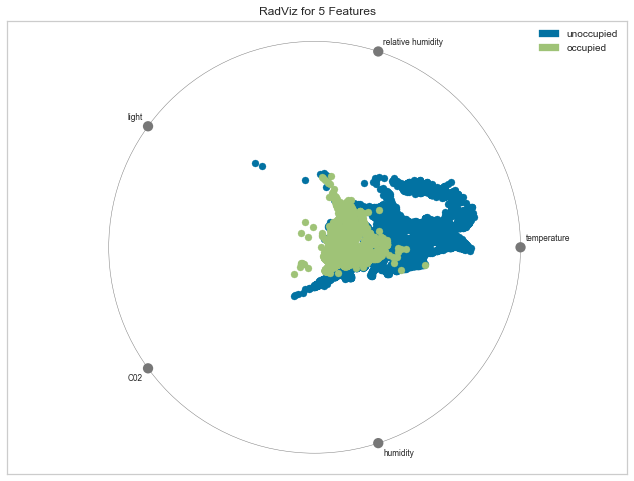

In [11]:
# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features, size=(800, 600))

# Fit the data to the visualizer
visualizer.fit(X, y)

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
visualizer.poof()

### Feature Analysis - Parallel Coordinates Plot

In [12]:
from yellowbrick.features.pcoords import ParallelCoordinates

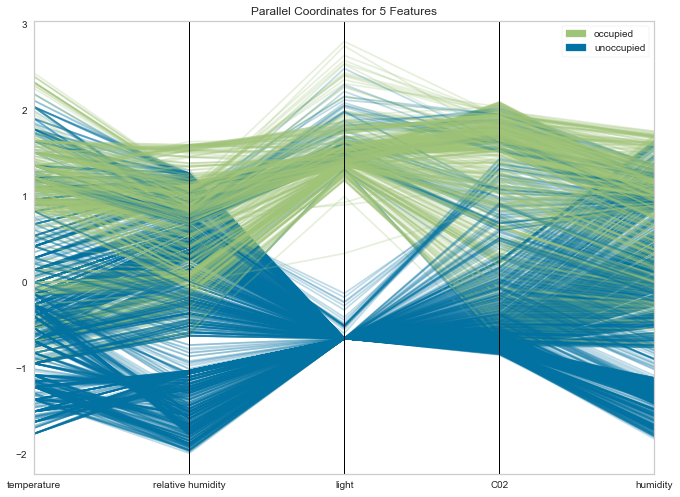

In [13]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, 
    features=features, 
    normalize='standard', 
    sample = 0.1,
    size=(800, 600)
)

# Fit the data to the visualizer
visualizer.fit(X, y)

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
visualizer.poof()

### Feature Analysis - Rank Features

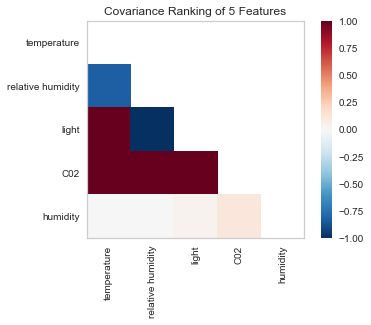

In [14]:
# Instantiate the visualizer with the Covariance ranking algorithm
from yellowbrick.features.rankd import Rank2D
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

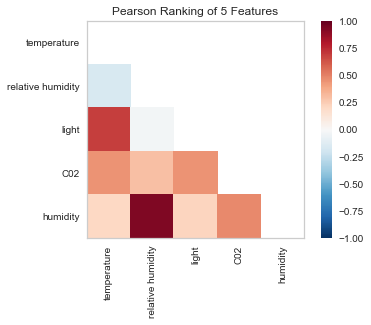

In [15]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

### Feature Analysis - Manifold Visualization

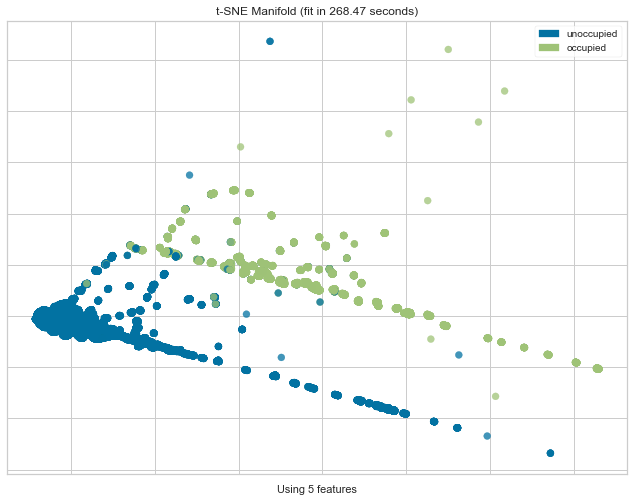

In [16]:
from yellowbrick.features.manifold import Manifold

visualizer = Manifold(manifold='tsne', target='discrete', classes=classes, size=(800, 600))
visualizer.fit_transform(X,y)
visualizer.poof()

<h2 align=center> Model Selection and Evaluation </h2>

1. Choose a `model family` that best captures the relationship between the variables of interest.
2. Define a `model form` that specifies exactly how features interact to make a prediction.
3. Train a `fitted model` by optimizing internal parameters to the data.

### ROC/AUC Plots

In [17]:
# Create the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

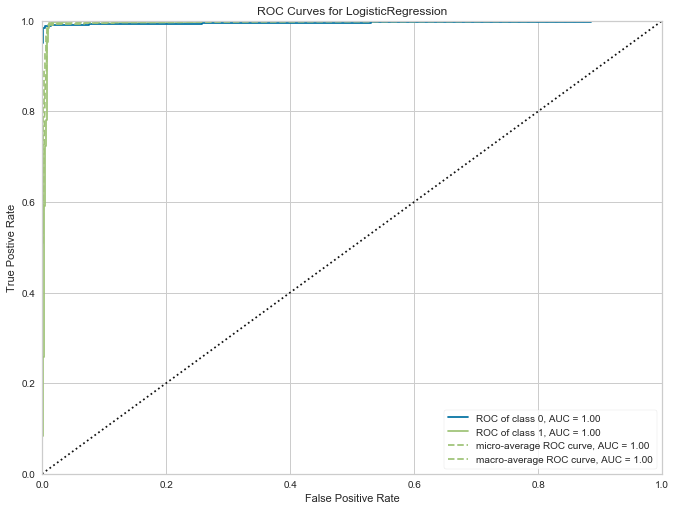

In [19]:
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression

# Instantiate the classification model and visualizer
visualizer = ROCAUC(LogisticRegression(),size=(800,600))

# Fit the training data to the visualizer
visualizer.fit(X_train,y_train)

# Evaluate the model on the test data
visualizer.score(X_test,y_test)

# Draw/show/poof the data
p=visualizer.poof()

### Classification Report and Confusion Matrix


In [20]:
from yellowbrick.classifier import ClassificationReport

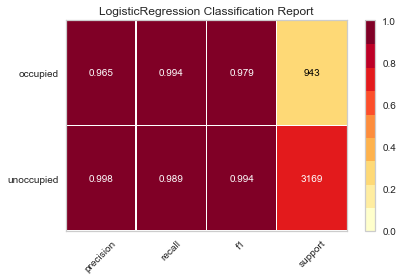

In [27]:
visualizer=ClassificationReport(LogisticRegression(), classes=classes, support=True)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y=y_test)
g=visualizer.poof()

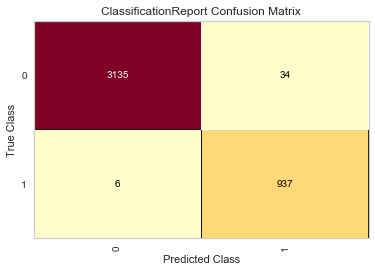

In [28]:
from yellowbrick.classifier import ConfusionMatrix

#The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(visualizer, classes=[0,1])

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

#How did we do?
cm.poof()

### Cross Validation Scores

In [29]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

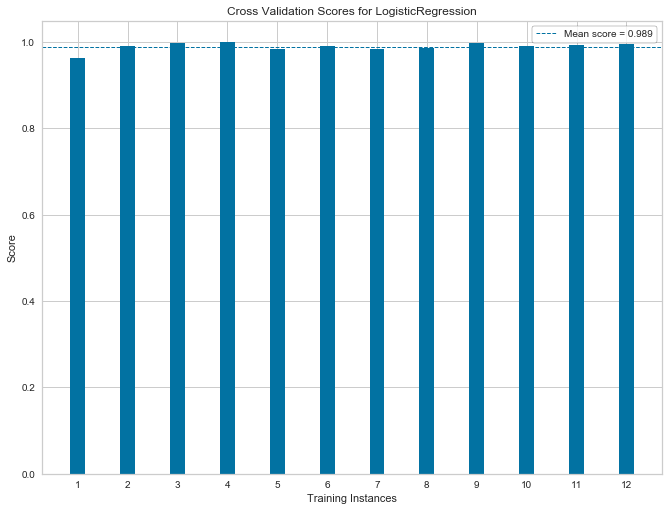

In [30]:
# Create a new figure and axes
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(12)

# Create the CV score visualizer
oz = CVScores(
    LogisticRegression(), ax=ax, cv=cv, 
    scoring='f1_weighted', size=(800,600)
)

oz.fit(X, y)
oz.poof()

### Evaluating Class Balance

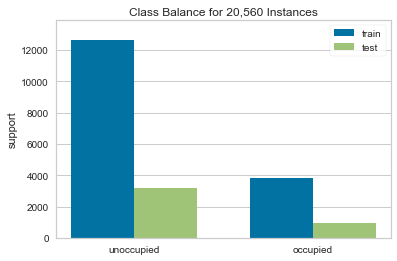

In [31]:
from yellowbrick.classifier import ClassBalance

# Instantiate the classification model and visualizer
visualizer = ClassBalance(labels=classes)

visualizer.fit(y_train, y_test)
visualizer.poof()

### Discrimination Threshold for Logistic Regression

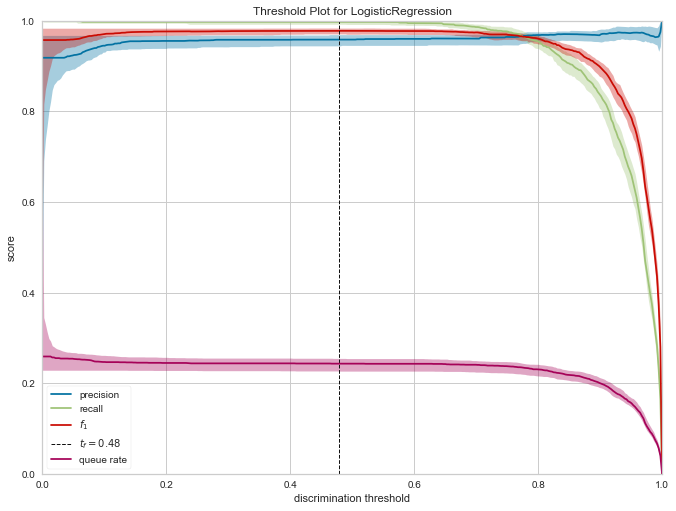

In [33]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(LogisticRegression(),size=(800,600))
visualizer.fit(X_train,y_train)
g=visualizer.poof()